In [1]:
from ase.spacegroup import crystal
bery1 = crystal(['Be', 'Be'], basis=[(0, 0, 0), (0.5, 0.5, 0.5)], spacegroup=225, cellpar=[2.287, 2.287, 2.287, 90, 90, 90])

In [2]:
bery1.write('Be.cif')


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  24.6.0
 |___|_|             

User:   hhzheng@qstation01
Date:   Wed Aug  7 16:16:22 2024
Arch:   x86_64
Pid:    20816
CWD:    /data/hhzheng/flare/FLARE-Tutorials/OTF
Python: 3.9.19
gpaw:   /home/hhzheng/.conda/envs/flare-dev/lib/python3.9/site-packages/gpaw
_gpaw:  /home/hhzheng/.conda/envs/flare-dev/lib/python3.9/site-packages/
        _gpaw.cpython-39-x86_64-linux-gnu.so
ase:    /home/hhzheng/.conda/envs/flare-dev/lib/python3.9/site-packages/ase (version 3.23.0)
numpy:  /home/hhzheng/.conda/envs/flare-dev/lib/python3.9/site-packages/numpy (version 1.26.4)
scipy:  /home/hhzheng/.conda/envs/flare-dev/lib/python3.9/site-packages/scipy (version 1.13.1)
libxc:  6.2.2
units:  Angstrom and eV
cores: 1
OpenMP: True
OMP_NUM_THREADS: 1

Input parameters:
  kpts: [4 4 4]
  mode: pw

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

species:
  Al:
    name: Al

<Axes: title={'center': 'sj: E: -4.130 eV, V: 15.904 Å$^3$, B: 87.060 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

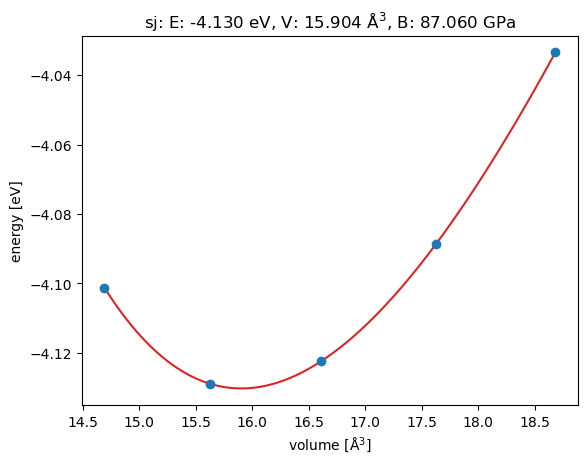

In [2]:
from ase.eos import EquationOfState
from ase.build import bulk
from gpaw import GPAW

al = bulk('Al', 'fcc', a=4.05)
calc = GPAW(mode='pw', kpts=(4, 4, 4))
al.calc = calc
cell = al.get_cell()
volumes = []
energies = []
for x in [0.96, 0.98, 1.0, 1.02, 1.04]:
    al.set_cell(cell * x, scale_atoms=True)
    energies.append(al.get_potential_energy())
    volumes.append(al.get_volume())

eos = EquationOfState(volumes, energies)
v0, e0, B = eos.fit()
print('Optimal volume:', v0, 'A^3')
print('Equilibrium energy:', e0, 'eV')
eos.plot('Al-eos.png')

In [3]:
from ase.units import fs
from ase.md.verlet import VelocityVerlet

dyn = VelocityVerlet(al, 5 * fs)
dyn.run(100)


Forces in eV/Ang:
  0 Al    0.00000   -0.00000   -0.00000



True